**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 네비게이션 주행데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 도착시각을 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas는 데이터 분석을 위해 널리 사용되는 파이썬 라이브러리입니다.
### Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* A0007IT.json 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.
* Encoding = "cp949"로 지정하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df = pd.read_json('/content/drive/MyDrive/KT_5mini/A0007IT.json', encoding='cp949')

In [ ]:
df.head()

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,35:21.0,55:22.6,12914.0,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,55:22.0,09:06.9,7483.0,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,13:46.0,22:32.9,8087.0,526.710998,55.273575,경기도,김포시,6,0,0,20
3,13:43.0,28:42.7,10528.0,898.581970,42.178456,경기도,광주시,2,0,0,20
4,01:57.0,17:58.2,10636.0,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20


<br>

### 4. Address1(주소1)에 대한 분포도를 알아 보려고 합니다.
### Address1(주소1)에 대해 countplot그래프로 만들고 아래 가이드에 따라 답하세요.
* Seaborn을 활용하세요.
* 첫번째, Address1(주소1)에 대해서 분포를 보여주는 countplot그래프 그리세요.
* 두번째, 지역명이 없는 '-'에 해당되는 row(행)을 삭제하세요.

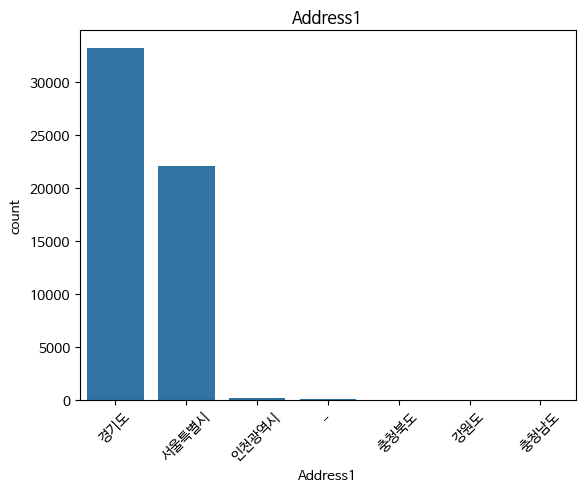

In [ ]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Address1', data=df)
plt.xticks(rotation=45)
plt.title('Address1')
plt.show()

In [ ]:
df.drop(df.loc[df['Address1'] == '-'].index, inplace=True)

In [ ]:
(df['Address1'] == '-').any()

False

<br>

### 5. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다.
### Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.
* Seaborn을 활용하세요.
* X축에는 Time_Driving(실주행시간)을 표시하고 Y축에는 Speed_Per_Hour(평균시속)을 표시하세요.

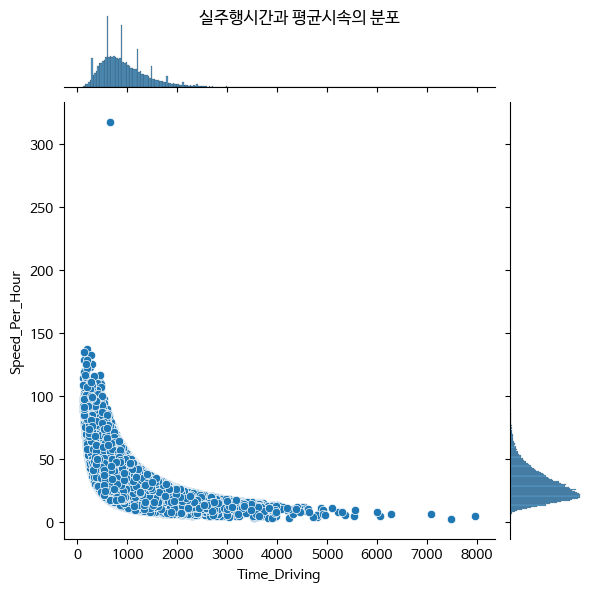

In [ ]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)
plt.suptitle('실주행시간과 평균시속의 분포')
plt.show()

<br>

### 6. 위의 jointplot 그래프에서 시속 300이 넘는 이상치를 발견할 수 있습니다.
### jointplot 그래프에서 발견한 이상치 1개를 삭제하세요.
* 대상 데이터프레임: df
* jointplot 그래프를 보고 시속 300 이상되는 이상치를 찾아 해당 행(Row)을 삭제하세요.
* 전처리 반영 후에 새로운 데이터프레임 변수명 df_temp에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df_temp = df.drop(df[df['Speed_Per_Hour'] >= 300].index)

<br>

### 7. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
### 아래 가이드를 따라 결측치 처리하세요.
* 대상 데이터프레임: df_temp
* 결측치를 확인하는 코드를 작성하세요.
* 결측치가 있는 행(raw)를 삭제 하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_na에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df_temp.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          2
Time_Driving      3
Speed_Per_Hour    5
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

In [ ]:
df_na = df_temp.dropna()

In [ ]:
df_na.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          0
Time_Driving      0
Speed_Per_Hour    0
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

<br>

### 8. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
### 아래 가이드를 따라 불필요 데이터를 삭제 처리하세요.
* 대상 데이터프레임: df_na
* 'Time_Departure', 'Time_Arrival' 2개 컬럼을 삭제하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df_del = df_na.drop(columns=['Time_Departure', 'Time_Arrival'])

<br>

### 9. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.
### 원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
* 대상 데이터프레임: df_del
* 원-핫 인코딩 대상: object 타입의 전체 컬럼
* 활용 함수: pandas의 get_dummies
* 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [ ]:
df_del.dtypes

Distance          float64
Time_Driving      float64
Speed_Per_Hour    float64
Address1           object
Address2           object
Signaltype          int64
Weekday             int64
Hour                int64
Day                 int64
dtype: object

In [ ]:
# 여기에 답안코드를 작성하세요.
dumm_cols = df_del.select_dtypes(include='object').columns
df_preset = pd.get_dummies(df_del, columns = dumm_cols, drop_first=True, dtype=int)

In [ ]:
df_preset.dtypes

Distance          float64
Time_Driving      float64
Speed_Per_Hour    float64
Signaltype          int64
Weekday             int64
                   ...   
Address2_평택시        int64
Address2_포천시        int64
Address2_하남시        int64
Address2_홍천군        int64
Address2_화성시        int64
Length: 88, dtype: object

<br>

### 10. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
### Time_Driving(실주행시간) 컬럼을 label값 y로, 나머지 컬럼을 feature값 X로 할당한 후 훈련데이터셋과 검증데이터셋으로 분리하세요.
* 대상 데이터프레임: df_preset
* 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
* 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
* 훈련 데이터셋과 검증데이터셋 비율은 80:20
* random_state: 42
* Scikit-learn의 train_test_split 함수를 활용하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df_preset.drop(columns=['Time_Driving'])
y = df_preset['Time_Driving']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((44344, 87), (11087, 87), (44344,), (11087,))

<br>

### 11. Time_Driving(실주행시간)을 예측하는 머신러닝 모델을 만들려고 합니다.
### 의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 모형으로
### 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있습니다.
### 의사결정나무(decision tree)로 학습을 진행하세요.
* 트리의 최대 깊이: 5로 설정
* 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split): 3로 설정
* random_state: 120로 설정

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

<br>

### 12. 위 의사결정나무(decision tree) 모델의 성능을 평가하려고 합니다.
### 예측 결과의 mae(Mean Absolute Error)를 구하세요.
* 성능 평가는 검증 데이터셋을 활용하세요.
* 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.
* 검증 정답(y_valid)과 예측값(y_pred)의 mae(Mean Absolute Error)를 구하고 dt_mae 변수에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import mean_absolute_error

y_pred = tree_reg.predict(X_valid)
print(mean_absolute_error(y_valid, y_pred))

113.87838566407876


<br>

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

<br>

### 13. Time_Driving(실주행시간)을 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
# 여기에 답안코드를 작성하세요.

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                5632      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8257 (32.25 KB)
Trainable params: 8257 (32.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2772/2772 [==============================] - 8s 3ms/step - loss: 167093.1094 - mae: 279.9256 - val_loss: 128642.6875 - val_mae: 249.7235
Epoch 2/30
2772/2772 [==============================] - 8s 3ms/step - loss: 61604.5156 - mae: 160.9744 - val_loss: 32351.5391 - val_mae: 123.9372
Epoch 3/30
2772/2772 [==============================] - 6s 2ms/step - loss: 31278.9551 - mae: 114.1828 - val_loss: 39376.6914 - val_mae: 157.5644
Epoch 4/30
2772/2772 [==============================] - 10s 3ms/step - loss: 23785.3398 - mae: 98.7057 - val_loss: 39596.4961 - val_mae: 152.4854
Epoch 5/30
2772/2772 [==============================] - 7s 2ms/step - loss: 20788.5039 - mae: 90.3692 - val_loss: 42843.8047 - val_mae: 178.9075
Epoch 6/30
2772/2772 [==============================] - 8s 3ms/step - loss: 19779.2344 - mae: 86.4255 - val_loss: 48552.4141 - val_mae: 176.1976
Epoch 7/30
2772/2772 [==============================] - 7s 2ms/step - loss: 19175.6875 - mae: 83.3424 - val_loss: 124826.992

<br>

### 14. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
* 그래프의 타이틀은 'Model MSE'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

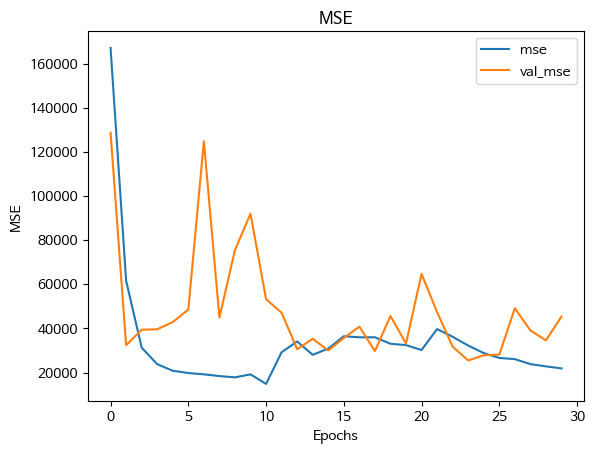

In [ ]:
# 여기에 답안코드를 작성하세요.
mse = history.history['loss']
val_mse = history.history['val_loss']

plt.plot(mse, label='mse')
plt.plot(val_mse, label='val_mse')
plt.legend()
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [ ]:
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_mse = model.evaluate(X_valid, y_valid, verbose=0)

print(f"훈련 세트 MSE: {train_mse}")
print(f"검증 세트 MSE: {val_mse}")

훈련 세트 MSE: 156.5322265625
검증 세트 MSE: 156.10533142089844
